In [2]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import numpy as np
import cv2 as cv
import os
import pickle

In [3]:
from matplotlib import pyplot as plt
img = cv.imread('photo_2019-03-13_10-36-07.jpg')
#img = cv.resize(oriimg,None,fx=0.5,fy=0.5)
#imgnew=img[0:400,0:359,:]
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [53]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [54]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [60]:
markers2 = cv.watershed(img,thresh)
img[markers2 == -1] = [255,0,0]

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'


In [110]:
img = cv.imread('photo_2019-03-13_09-56-17.jpg')
img = cv.resize(oriimg,None,fx=0.5,fy=0.5)cv.imshow('frame',img)
while(True):    # Display the resulting frame

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cv.destroyAllWindows()

SyntaxError: invalid syntax (<ipython-input-110-61cff903f29b>, line 2)

In [11]:
imgnew=img[0:400,0:359,:]

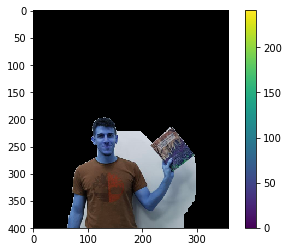

(<matplotlib.image.AxesImage at 0x7f55200b30b8>,
 None)

In [72]:
img = cv.imread('photo_2019-03-13_09-56-17.jpg')
img = cv.resize(oriimg,None,fx=0.5,fy=0.5)

img=img[0:400,0:359,:]
array=np.zeros(img.shape,np.uint8)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(51,182,296,399)
#rect2(300,250,400,300)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(), plt.show()


In [100]:
mask=np.zeros(img.shape[:2],np.uint8)

In [117]:
cv.GC_PR_FGD

3

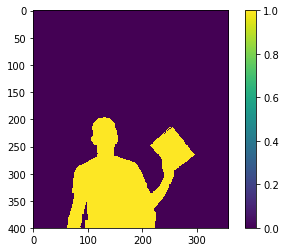

In [30]:
img = cv.imread('photo_2019-03-13_09-56-17.jpg')
img = cv.resize(img,None,fx=0.5,fy=0.5)
img=img[0:400,0:359,:]

img = cv.pyrMeanShiftFiltering( img, 5, 30)
mask=np.zeros(img.shape[:2],np.uint8)
mask[:,:]=cv.GC_PR_BGD
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
mask[0:190,0:399]=cv.GC_BGD
mask[191:399,80:300]=cv.GC_PR_FGD
mask[280:399,100:170]=cv.GC_FGD
mask[320:399,250:350]=cv.GC_BGD

mask[375:385,90:100]=cv.GC_BGD
rect=(51,182,296,399)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK);
mask2 = np.where((mask==3)| (mask==1),1,0).astype('uint8')
imgplt = mask2[:,:]
plt.imshow(imgplt),plt.colorbar(), plt.show()
plt.imshow(img)

In [33]:
cv.imshow('frame',60*imgplt)
while(True):    # Display the resulting frame

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cv.destroyAllWindows()

In [31]:
imgplt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
imgcontour, contours= cv.findContours(imgplt, cv.RETR_LIST,cv.CHAIN_APPROX_NONE)

In [35]:
contours

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6, -1, -1]]], dtype=int32)

In [60]:
imgcontour[7]

array([[[129, 197]],

       [[128, 198]],

       [[127, 198]],

       ...,

       [[132, 197]],

       [[131, 197]],

       [[130, 197]]], dtype=int32)

In [41]:
for c in imgcontour:
    cv.drawContours(imgplt, c, -1, (240, 0, 159), 3)
cv.imshow("Contours", imgplt)
cv.waitKey(0)




113

In [13]:
imgcontour.shape

(1, 1014, 1, 2)

In [39]:
cv.imshow('frame',image)
while(True):    # Display the resulting frame

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cv.destroyAllWindows()

In [ ]:

image=cv.drawContours(imgplt, imgcontour,0, (255,255,255))


In [64]:
for c in imgcontour:
    l=cv.arcLength(c,True)
    print (l,c.shape)

5.656854152679443 (4, 1, 2)
5.656854152679443 (4, 1, 2)
5.656854152679443 (4, 1, 2)
13.313708305358887 (10, 1, 2)
5.656854152679443 (4, 1, 2)
5.656854152679443 (4, 1, 2)
18.97056245803833 (14, 1, 2)
1148.0458060503006 (1001, 1, 2)


array([[[129, 197]],

       [[128, 198]],

       [[127, 198]],

       ...,

       [[132, 197]],

       [[131, 197]],

       [[130, 197]]], dtype=int32)